In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/Users/yubinye/Downloads/Sample Data_Sales.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Opportunity ID                1020 non-null   object
 1   Market Segment                1020 non-null   object
 2   Close Date                    1020 non-null   object
 3   Stage                         1020 non-null   object
 4   First Meeting Contact: Title  1020 non-null   object
 5   Lead Source                   1012 non-null   object
dtypes: object(6)
memory usage: 47.9+ KB


In [4]:
df.head()

,Opportunity ID,Market Segment,Close Date,Stage,First Meeting Contact: Title,Lead Source
0,0063l00000k3qAX,MM,12/17/20,8 - Closed Lost,Tech Recruiter,Offline Sources
1,0063l00000hbTDr,MM,3/28/20,8 - Closed Lost,"Director, Talent",Offline Sources
2,0061N00000dLl4v,ENT,1/30/20,8 - Closed Won,Sourcing Strategist,KlientBoost
3,0061N00000gYcpX,ENT,1/14/20,8 - Closed Lost,"Talent Acquistion CoE, Strategic Initiatives A...",Trade Show
4,0063l00000ilgAx,ENT,12/30/20,8 - Closed Won,"Manager, Talent Partnerships",Paid Search


In [5]:
df.to_excel ('/Users/yubinye/Downloads/Sample Data_Sales.csv.xlsx', index = None, header=True)

# Question 1: Summarize the Data
Calculate the following metrics for the user cohort*
1) Number of new ​installs​ per day

2) Return rate​ for day 1, day 7, day 14, day 28, day 35 and day 42

3) Purchase conversion rate​: Percentage (%) of new installs who made at least one
purchase of our in-app subscription service

4) Cohort ​ARPD

### (1) Number of new installs per day

In [3]:
session["session_timestamp"] = pd.to_datetime(session.session_timestamp)
session['date'] = session["session_timestamp"].dt.date

In [4]:
date_user = session.groupby(['device_id','date']).first()
active = pd.DataFrame(list(date_user.index),columns = ['device_id','date'])

In [5]:
# get the first date of each unique id
cohort = active.drop_duplicates(subset=['device_id'])

### (2) Return rate for day 1, day 7, day 14, day 28, day 35 and day 42

In [6]:
import datetime
delta = [1,7,14,28,35,42]
for i in delta:
    days = datetime.timedelta(i)
    cohort['day{}'.format(i)] = cohort['date'] + days

In [7]:
cohort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53600 entries, 0 to 530203
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  53600 non-null  object
 1   date       53600 non-null  object
 2   day1       53600 non-null  object
 3   day7       53600 non-null  object
 4   day14      53600 non-null  object
 5   day28      53600 non-null  object
 6   day35      53600 non-null  object
 7   day42      53600 non-null  object
dtypes: object(8)
memory usage: 3.7+ MB


In [8]:
active.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530205 entries, 0 to 530204
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   device_id  530205 non-null  object
 1   date       530205 non-null  object
dtypes: object(2)
memory usage: 8.1+ MB


In [9]:
cohort.head()

,device_id,date,day1,day7,day14,day28,day35,day42
0,0000535c2f5fbd97aac16881104b5c60,2020-04-10,2020-04-11,2020-04-17,2020-04-24,2020-05-08,2020-05-15,2020-05-22
11,00019e060c8bea93601dbc690ccfe11d,2020-04-15,2020-04-16,2020-04-22,2020-04-29,2020-05-13,2020-05-20,2020-05-27
12,00037a65212efa30a049ee96996c9eb5,2020-04-15,2020-04-16,2020-04-22,2020-04-29,2020-05-13,2020-05-20,2020-05-27
13,0004af620e3cb6e3e0f13316cb23956e,2020-04-17,2020-04-18,2020-04-24,2020-05-01,2020-05-15,2020-05-22,2020-05-29
15,000540c74b5ca8f56ee26247966dec51,2020-04-11,2020-04-12,2020-04-18,2020-04-25,2020-05-09,2020-05-16,2020-05-23


In [10]:
active.head()

,device_id,date
0,0000535c2f5fbd97aac16881104b5c60,2020-04-10
1,0000535c2f5fbd97aac16881104b5c60,2020-05-11
2,0000535c2f5fbd97aac16881104b5c60,2020-05-12
3,0000535c2f5fbd97aac16881104b5c60,2020-05-15
4,0000535c2f5fbd97aac16881104b5c60,2020-05-17


In [11]:
df = pd.merge(active,cohort,on=["device_id"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530205 entries, 0 to 530204
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   device_id  530205 non-null  object
 1   date_x     530205 non-null  object
 2   date_y     530205 non-null  object
 3   day1       530205 non-null  object
 4   day7       530205 non-null  object
 5   day14      530205 non-null  object
 6   day28      530205 non-null  object
 7   day35      530205 non-null  object
 8   day42      530205 non-null  object
dtypes: object(9)
memory usage: 40.5+ MB


In [12]:
df.head(20)

,device_id,date_x,date_y,day1,day7,day14,day28,day35,day42
0,0000535c2f5fbd97aac16881104b5c60,2020-04-10,2020-04-10,2020-04-11,2020-04-17,2020-04-24,2020-05-08,2020-05-15,2020-05-22
1,0000535c2f5fbd97aac16881104b5c60,2020-05-11,2020-04-10,2020-04-11,2020-04-17,2020-04-24,2020-05-08,2020-05-15,2020-05-22
2,0000535c2f5fbd97aac16881104b5c60,2020-05-12,2020-04-10,2020-04-11,2020-04-17,2020-04-24,2020-05-08,2020-05-15,2020-05-22
3,0000535c2f5fbd97aac16881104b5c60,2020-05-15,2020-04-10,2020-04-11,2020-04-17,2020-04-24,2020-05-08,2020-05-15,2020-05-22
4,0000535c2f5fbd97aac16881104b5c60,2020-05-17,2020-04-10,2020-04-11,2020-04-17,2020-04-24,2020-05-08,2020-05-15,2020-05-22
5,0000535c2f5fbd97aac16881104b5c60,2020-05-26,2020-04-10,2020-04-11,2020-04-17,2020-04-24,2020-05-08,2020-05-15,2020-05-22
6,0000535c2f5fbd97aac16881104b5c60,2020-05-27,2020-04-10,2020-04-11,2020-04-17,2020-04-24,2020-05-08,2020-05-15,2020-05-22
7,0000535c2f5fbd97aac16881104b5c60,2020-06-08,2020-04-10,2020-04-11,2020-04-17,2020-04-24,2020-05-08,2020-05-15,2020-05-22
8,0000535c2f5fbd97aac16881104b5c60,2020-06-09,2020-04-10,2020-04-11,2020-04-17,2020-04-24,2020-05-08,2020-05-15,2020-05-22
9,0000535c2f5fbd97aac16881104b5c60,2020-06-11,2020-04-10,2020-04-11,2020-04-17,2020-04-24,2020-05-08,2020-05-15,2020-05-22


> the idea is that calculating the exact date for each new installer after 1,7,14,28,35,42 day

> and compare them with all sessions, if true, it means that users opened app at that date. 

> then calculate the sum of true, we can got the return rate

In [13]:
def count_true(lst):
    return sum(bool(x) for x in lst)

def return_rate_show(df):
    day0 = count_true(list(df.date_x == df.date_y))
    r_day1 = count_true(list(df.date_x == df.day1))/day0
    r_day7 = count_true(list(df.date_x == df.day7))/day0
    r_day14 = count_true(list(df.date_x == df.day14))/day0
    r_day28 = count_true(list(df.date_x == df.day28))/day0
    r_day35 = count_true(list(df.date_x == df.day35))/day0
    r_day42 = count_true(list(df.date_x == df.day42))/day0
    
    dt = pd.DataFrame([r_day1,r_day7,r_day14,r_day28,r_day35,r_day42],
                     columns = ['return_rate'])
    dt['days'] = ['r_day1','r_day7','r_day14','r_day28','r_day35','r_day42']
    return dt

In [14]:
return_rate_show(df)

,return_rate,days
0,0.425616,r_day1
1,0.233862,r_day7
2,0.180354,r_day14
3,0.133060,r_day28
4,0.118246,r_day35
5,0.102668,r_day42


### (3) Purchase conversion rate: 
Percentage (%) of new installs who made at least one purchase of our in-app subscription service

In [15]:
conversion=pd.read_csv('/Users/yubinye/Downloads/DataInterviewCase/mc_data_test_2_conversions.csv')
conversion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1643 entries, 0 to 1642
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   session_timestamp  1643 non-null   object
 1   event_offset       1643 non-null   int64 
 2   event_name         1643 non-null   object
 3   device_id          1643 non-null   object
 4   event_params       1643 non-null   object
dtypes: int64(1), object(4)
memory usage: 64.3+ KB


In [16]:
conversion.head()

,session_timestamp,event_offset,event_name,device_id,event_params
0,2020-04-11 08:44:43.739,69914,Subscribe_Complete,9c4db3b0f63af92ef52bb22986b12643,"{""product"":""com.pacer.inapp.autoyearly.trial.a..."
1,2020-04-14 12:56:56.847,1193,Subscribe_Complete,b5540d95a38b68955d1c7b0434c29718,"{""product"":""com.pacer.inapp.autoyearly.trial.a..."
2,2020-04-17 12:55:32.12,3742,Subscribe_Complete,02b38adf8bcc1c404dbcf983b8c0a5aa,"{""product"":""com.pacer.inapp.autoyearly.trial.a..."
3,2020-04-10 16:47:44.641,241422,Subscribe_Complete,61ec44abd063a46500b277dce58627d7,"{""product"":""com.pacer.inapp.autoyearly.trial.a..."
4,2020-04-12 13:51:42.409,59688,Subscribe_Complete,1acf2d78a658dff82c9f90d9cdf1e1b8,"{""product"":""com.pacer.inapp.autoyearly.trial.a..."


In [17]:
conversion.event_params.replace('{"product":"com.pacer.inapp.autoyearly.trial.ab4"}','autoyearly.trial.ab4',inplace=True)
conversion.event_params.replace('{"product":"com.pacer.inapp.automonthly.notrial.1"}','automonthly.notrial.1',inplace=True)
conversion.event_params.replace('{"product":"com.pacer.inapp.nonconsumable.lifetime.2"}','nonconsumable.lifetime.2',inplace=True)

In [18]:
conversion.event_params.value_counts()

autoyearly.trial.ab4        1442
automonthly.notrial.1        185
nonconsumable.lifetime.2      16
Name: event_params, dtype: int64

In [19]:
conversion.device_id.value_counts()

6f56cf55572dd9d87a7ec46120bb1996    1
fcfac865ea03fd89ea1d222fe2c8bfc3    1
4d77eea64faf95f3e9201f85c1d1d4bf    1
fb13a595e2c5e93665db13faa98aad2c    1
e8ad17f84c567f97c1a7bf5cc7c44c7a    1
                                   ..
d10bd7742bd088a46222ca0567859ca6    1
7900c81f27e1f81bf51dad7fbfb8c656    1
e6bc175eaf3952bc9a5b9206377d6608    1
d112f4dc8f8f44b283a6ecd1310cd61c    1
0fc49d785087d52afdd96181022745f9    1
Name: device_id, Length: 1643, dtype: int64

> no user have two purchase, so the number if subscribe_compelet is the total numebr that new installs who made at least one purchase of our in-app subscription service

In [20]:
print("Purchase conversion rate is %",100*len(conversion)/len(cohort))

Purchase conversion rate is % 3.0652985074626864


### (4)Cohort ARPD

ARPD is Average Revenue Per Download. 

It is the sum of all revenue divided by the total number of downloads. We look at this by cohort group.

Revenue is SUBSCRIPTION REVENUE + ADVERTISING REVENUE.

In [21]:
count = conversion.event_params.value_counts()
sub_revenue = 8.40*count[0] + 13.8*count[1] + 69.99*count[2]

In [22]:
ads=pd.read_csv('/Users/yubinye/Downloads/DataInterviewCase/mc_data_test_3_ads.csv')
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547083 entries, 0 to 1547082
Data columns (total 5 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   session_timestamp  1547083 non-null  object
 1   event_offset       1547083 non-null  int64 
 2   event_name         1547083 non-null  object
 3   device_id          1547083 non-null  object
 4   num_impressions    1547083 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 59.0+ MB


In [23]:
ads.head()

,session_timestamp,event_offset,event_name,device_id,num_impressions
0,2020-04-10 00:15:15.246,5,Ad_Impressions,66d670bd23b3d9c70ba30c76b33f58f0,1
1,2020-04-10 01:15:29.924,0,Ad_Impressions,732837acbeaba6aa66c2ab1e54fe52de,1
2,2020-04-10 01:44:32.26,40,Ad_Impressions,534fd617423ec7d89849c5e011efff7c,1
3,2020-04-10 02:41:20.123,0,Ad_Impressions,55712841db43ac1c8f527b8f1d0f8abb,1
4,2020-04-10 03:28:50.804,5,Ad_Impressions,8351fa9d7c0fc5d7997233ef44e65677,1


To estimate advertising revenue, 
assume an eCPM of 2.50 for all ad impressions

That is, 1000 impressions = $2.50 in revenue

In [24]:
ads_revenue = len(ads)/1000*2.5

In [25]:
revenue = ads_revenue + sub_revenue

In [26]:
ARPD = revenue/len(cohort)
print(ARPD)

0.3666669309701493


# Question 2: Analyze an A/B Test

### (1) A/B test for ARPD

In [27]:
abtest=pd.read_csv('/Users/yubinye/Downloads/DataInterviewCase/mc_data_test_4_abtest_logs.csv')
ab_purchase = pd.merge(abtest,conversion,on=["device_id"])

In [28]:
ab_purchase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1453 entries, 0 to 1452
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   device_id          1453 non-null   object
 1   abtest_group       1453 non-null   object
 2   abtest_id          1453 non-null   object
 3   session_timestamp  1453 non-null   object
 4   event_offset       1453 non-null   int64 
 5   event_name         1453 non-null   object
 6   event_params       1453 non-null   object
dtypes: int64(1), object(6)
memory usage: 90.8+ KB


In [29]:
A_purchase = ab_purchase.groupby(['abtest_group']).get_group("TestGroupA-1StepPurchaseFlow")
B_purchase = ab_purchase.groupby(['abtest_group']).get_group("TestGroupB-2StepPurchaseFlow")

In [30]:
#print('ARPD for group A is $',revenue(A_purchase)/len(A_purchase))
count = A_purchase.event_params.value_counts()
A_revenue = 8.40*count[0] + 13.8*count[1] + 69.99*count[2]

count = B_purchase.event_params.value_counts()
B_revenue = 8.40*count[0] + 13.8*count[1] + 69.99*count[2]

In [31]:
print('\n ARPD for group A is $',A_revenue/len(A_purchase),
     '\n ARPD for group B is $',B_revenue/len(B_purchase))


 ARPD for group A is $ 9.114722598105548 
 ARPD for group B is $ 9.451470588235294


### (2) A/B test for return rate

In [32]:
ab_return = pd.merge(abtest,session,on=["device_id"])
A_return = ab_return.groupby(['abtest_group']).get_group("TestGroupA-1StepPurchaseFlow")
B_return = ab_return.groupby(['abtest_group']).get_group("TestGroupB-2StepPurchaseFlow")

In [33]:
def return_rate(data):

    date_user = data.groupby(['device_id','date']).first()
    active = pd.DataFrame(list(date_user.index),columns = ['device_id','date'])
    cohort = active.drop_duplicates(subset=['device_id'])
    delta = [1,7,14,28,35,42]
    for i in delta:
        days = datetime.timedelta(i)
        cohort['day{}'.format(i)] = cohort['date'] + days

    df = pd.merge(active,cohort,on=["device_id"])
    dt = return_rate_show(df)
    return dt

In [34]:
ab_return = pd.merge(return_rate(A_return),return_rate(B_return),on=['days'])
ab_return.columns=['a_group','days','b_group']
ab_return

,a_group,days,b_group
0,0.465459,r_day1,0.477607
1,0.258440,r_day7,0.258468
2,0.195780,r_day14,0.202357
3,0.142890,r_day28,0.149153
4,0.125872,r_day35,0.132320
5,0.110321,r_day42,0.114007


# Question 3: Exploration

In [35]:
demos=pd.read_csv('/Users/yubinye/Downloads/DataInterviewCase/mc_data_test_5_demos.csv')
behavior=pd.read_csv('/Users/yubinye/Downloads/DataInterviewCase/mc_data_test_6_app_behavior.csv')

In [36]:
demo_behav = pd.merge(demos,behavior,on=["device_id"])
demo_behav = demo_behav[['device_id','year_of_birth','gender','event_name']]

conv_demo = pd.merge(demo_behav,conversion,on=["device_id"])

sess_demo = pd.merge(demo_behav,session,on=["device_id"])

## revenue

In [37]:
def count_conv_demo(data,y):
    conv_ = data.groupby(['event_params',y]).count()
    con_demo = pd.DataFrame(list(conv_.index),columns = ['purchase',y])
    con_demo['count'] = list(conv_.device_id)
    return con_demo

In [38]:
count_conv_demo(conv_demo,'gender')

,purchase,gender,count
0,automonthly.notrial.1,female,998
1,automonthly.notrial.1,male,616
2,autoyearly.trial.ab4,female,5112
3,autoyearly.trial.ab4,male,3632
4,nonconsumable.lifetime.2,female,23
5,nonconsumable.lifetime.2,male,24


> female users are more likely to purchase montly trail

> male users are more likely to purchase year trail

In [41]:
pec = count_conv_demo(conv_demo,'event_name_x')
pec 

,purchase,event_name_x,count
0,automonthly.notrial.1,Health-Completed-GuidedWorkout,422
1,automonthly.notrial.1,Health-Input-BloodPressure,12
2,automonthly.notrial.1,Health-Input-BodyWeight,833
3,automonthly.notrial.1,Health-Tracked-OutdoorExercise,694
4,automonthly.notrial.1,Social-Checkin,53
5,automonthly.notrial.1,Social-Competition-Joined,52
6,automonthly.notrial.1,Social-Group-Joined,34
7,autoyearly.trial.ab4,Health-Completed-GuidedWorkout,935
8,autoyearly.trial.ab4,Health-Input-BloodPressure,317
9,autoyearly.trial.ab4,Health-Input-BodyWeight,5036


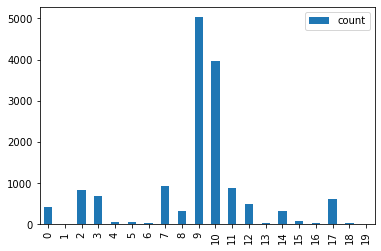

In [42]:
pec.plot.bar(stacked=True)

>  users who purchase `yearly` trial are more likely have the following behavior:

- Health-Input-BodyWeight 
- Health-Tracked-OutdoorExercise
- Health-Completed-GuidedWorkout

In [43]:
def conv_year(data,y):
    conv_gender_birth = conv_demo.groupby(['event_params',y]).mean()
    con_demo2 = pd.DataFrame(list(conv_gender_birth.index),columns = ['purchase',y])
    con_demo2['year_of_birth'] = list(round(conv_gender_birth.year_of_birth))
    return con_demo2

In [44]:
conv_year(conv_demo,'gender')

,purchase,gender,year_of_birth
0,automonthly.notrial.1,female,1989.0
1,automonthly.notrial.1,male,1985.0
2,autoyearly.trial.ab4,female,1982.0
3,autoyearly.trial.ab4,male,1978.0
4,nonconsumable.lifetime.2,female,1969.0
5,nonconsumable.lifetime.2,male,1987.0


> elder female prefer live time purchase

> younger female prefer monthly purchase

> elder male prefer yearly purchase

> younger male prefer both monthly and life time purchase

## return rate

In [45]:
female = sess_demo.groupby(['gender']).get_group("female")
male = sess_demo.groupby(['gender']).get_group("male")

In [46]:
dfs_gd = [return_rate(female),return_rate(male)]

In [47]:
gender_return = pd.concat(dfs_gd,axis=1)
gender_return.index = ['r_day1','r_day7','r_day14','r_day28','r_day35','r_day42']
gender_return.drop(['days'],axis=1,inplace=True)
gender_return.columns = ['female','male']
gender_return

,female,male
r_day1,0.490066,0.482743
r_day7,0.271466,0.273382
r_day14,0.209165,0.212774
r_day28,0.157341,0.158538
r_day35,0.137385,0.142608
r_day42,0.120864,0.120837


> there isn\`t much difference between female\`s return rate and male`s

In [48]:
sub1 = sess_demo.groupby(['event_name_x']).get_group("Health-Completed-GuidedWorkout")
sub2= sess_demo.groupby(['event_name_x']).get_group("Health-Input-BloodPressure")
sub3 = sess_demo.groupby(['event_name_x']).get_group("Health-Input-BodyWeight")

sub4 = sess_demo.groupby(['event_name_x']).get_group("Health-Tracked-OutdoorExercise")
sub5 = sess_demo.groupby(['event_name_x']).get_group("Social-Checkin")
sub6 = sess_demo.groupby(['event_name_x']).get_group("Social-Competition-Joined")

sub7 = sess_demo.groupby(['event_name_x']).get_group("Social-Friends-Like")
sub8 = sess_demo.groupby(['event_name_x']).get_group("Social-Group-Joined")

In [49]:
dfs_bh = [return_rate(sub1), return_rate(sub2), return_rate(sub3), return_rate(sub4),
       return_rate(sub5), return_rate(sub6),return_rate(sub7), return_rate(sub8)]

In [50]:
bh_return = pd.concat(dfs_bh,axis = 1)
bh_return.index = ['r_day1','r_day7','r_day14','r_day28','r_day35','r_day42']
bh_return.drop(['days'],axis=1,inplace=True)
bh_return.columns = pd.unique(behavior.event_name)
bh_return

,Health-Input-BodyWeight,Health-Input-BloodPressure,Health-Tracked-OutdoorExercise,Health-Completed-GuidedWorkout,Social-Group-Joined,Social-Checkin,Social-Competition-Joined,Social-Friends-Like
r_day1,0.747027,0.732887,0.466682,0.631908,0.820598,0.774011,0.908046,0.761538
r_day7,0.505946,0.506696,0.257221,0.405257,0.601329,0.581293,0.724138,0.605983
r_day14,0.416216,0.413690,0.199574,0.328127,0.551495,0.495920,0.551724,0.525641
r_day28,0.303784,0.322917,0.148220,0.247980,0.398671,0.396108,0.482759,0.384615
r_day35,0.280000,0.307292,0.131543,0.219326,0.388704,0.367859,0.356322,0.339316
r_day42,0.242162,0.258929,0.115033,0.187332,0.345515,0.334589,0.379310,0.304274


> social group joined and social competition joint may largely contribute to a relatively high return rate

> health tracked outdoor excericise has small contribution on return rate